#  Exploratory Data Analysis and K Nearest Neighbors Classification

For this assignment you will perform exploratory data analysis to visualize Fisher’s Iris dataset using Scikit Learn. And, you will explore the bias/variance trade-off by applying k-nearest neighbors classification to the Iris dataset and varying the hyperparameter k.

Documentation for Scikit Learn:
+ The top level documenation page is here: https://scikit-learn.org/stable/index.html
+ The API for the KNearestNeighborsClassifier is here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
+ The User Guide for KNearestNeighborsClassifier is here: https://scikit-learn.org/stable/modules/neighbors.html#classification
+ Scikit Learn provides many Jupyter notebook examples on how use the toolkit. These Jupyter notebook examples can be run on MyBinder: https://scikit-learn.org/stable/auto_examples/index.html

For more information about the Iris dataset, see this page https://en.wikipedia.org/wiki/Iris_flower_data_set.

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from pandas import DataFrame

Load Iris dataset

In [19]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target

In [4]:
print("Number of instances in the iris dataset:", X.shape[0])
print("Number of features in the iris dataset:", X.shape[1])
print("The dimension of the data matrix X is", X.shape)

Number of instances in the iris dataset: 150
Number of features in the iris dataset: 4
The dimension of the data matrix X is (150, 4)


In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

The `y` vector length is 150. It has three unique values: 0, 1 and 2. Each value represents a species of iris flower.

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
y.shape

(150,)

In [8]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Extension: Show the summary table of iris data including min, max, median, quantiles

In [11]:
# Insert your answer here
#importing seaborn and loading data set  
import seaborn as sns
iris_df=sns.load_dataset("iris")



In [12]:
#Median for each attribute
print(iris_df['sepal_length'].median())
print(iris_df['sepal_width'].median())
print(iris_df['petal_length'].median())
print(iris_df['petal_width'].median())

5.8
3.0
4.35
1.3


In [13]:
# To get the summary table

iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Part 1Exploratory Data Analysis
### Part 1a
Generate [scatter plots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) using each pair of the attributes as axis. You should generate $6 = {4 \choose 2}$ scatter plots.

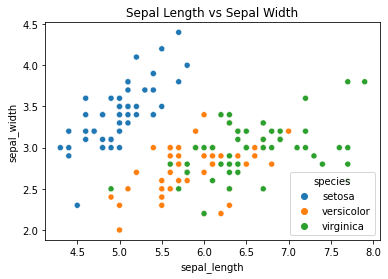

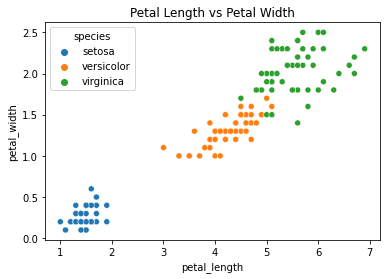

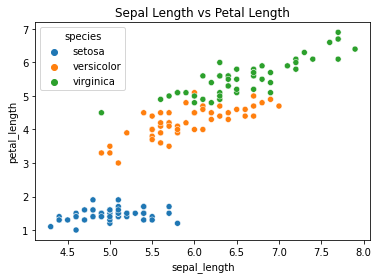

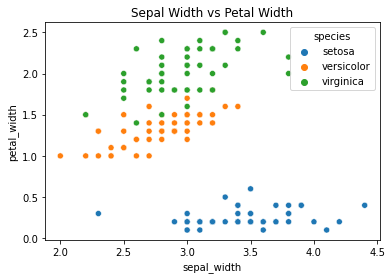

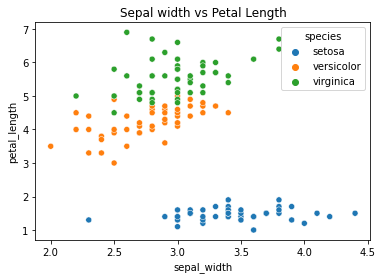

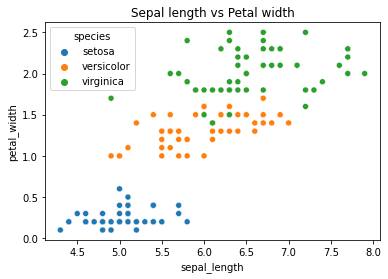

In [14]:
## Use the iris data before which is already loaded and draw scatter plot for each attribute

# scatter plot of sepal length vs sepal width
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris_df, hue="species")
plt.title("Sepal Length vs Sepal Width")
plt.show()

# scatter plot of petal length vs petal width
sns.scatterplot(x="petal_length", y="petal_width", data=iris_df, hue="species")
plt.title("Petal Length vs Petal Width")
plt.show()

# scatter plot of sepal length vs petal length
sns.scatterplot(x="sepal_length", y="petal_length", data=iris_df, hue="species")
plt.title("Sepal Length vs Petal Length")
plt.show()

# scatter plot of sepal width vs petal width
sns.scatterplot(x="sepal_width", y="petal_width", data=iris_df, hue="species")
plt.title("Sepal Width vs Petal Width")
plt.show()

# scatter plot of sepal width vs petal length
sns.scatterplot(x="sepal_width", y="petal_length", data=iris_df, hue="species")
plt.title("Sepal width vs Petal Length")
plt.show()


# scatter plot of sepal length vs petal width
sns.scatterplot(x="sepal_length", y="petal_width", data=iris_df, hue="species")
plt.title("Sepal length vs Petal width")
plt.show()


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

### Extension: Draw a boxplot of sepal length (cm), sepal width (cm), petal length (cm), petal width (cm). Use color to show the different target class.

Some links to help you: 

https://seaborn.pydata.org/generated/seaborn.boxplot.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

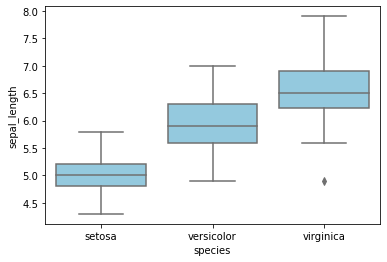

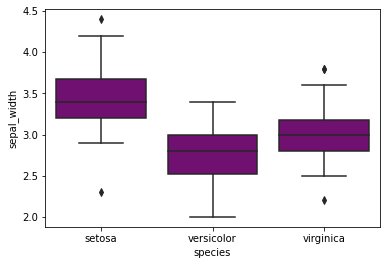

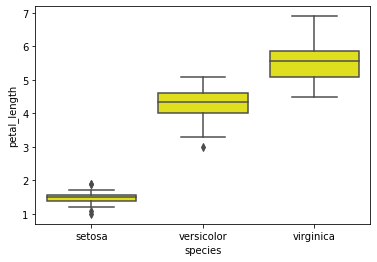

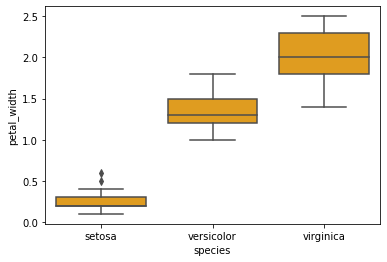

In [16]:
##Use the loaded datset of iris

# Plot a boxplot for each attribute asked, using different colour for each targets
sns.boxplot(x="species", y="sepal_length", data=iris_df, color="skyblue")
plt.show()

sns.boxplot(x="species", y="sepal_width", data=iris_df, color="purple")
plt.show()

sns.boxplot(x="species", y="petal_length", data=iris_df, color="yellow")
plt.show()

sns.boxplot(x="species", y="petal_width", data=iris_df, color="orange")
plt.show()


### Part 1b
If you were to draw linear decision boundaries to separate the classes, which scatter plot do you think will have the least error and which the most?

### Insert your 1b answer here
...In order to draw linear decsion boundaries to separate each class we can use the above scatter plots from which we can get least error that means easily can be identified are , plot petal length and petal width and error most is given by plot sepal length and sepal width so

#1.least error is between petal length and petal width:can easily separate the targets
#2.High error is between sepal length and sepal width:Difficult to separate the targets

### Part 1c
Scatter plots using two attributes of the data are equivalent to project the four dimensional data down to two dimensions using axis-parallel projection. Principal component analysis (PCA) is a technique to linearly project the data to lower dimensions that are not necessarily axis-parallel. Use PCA to project the data down to two dimensions.

Documentation for PCA:
+ API https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
+ User guide https://scikit-learn.org/stable/modules/decomposition.html#pca

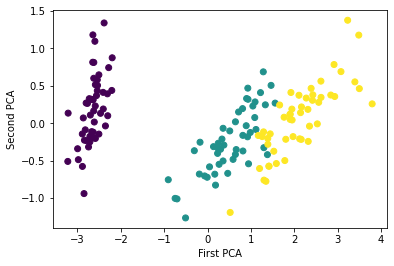

In [24]:
### Insert your code 
from sklearn.decomposition import PCA


X = iris.data  
y = iris.target


# Initializing  the PCA model
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(X)

# Transform the givendata to 2 dimensions
transformed_data = pca.transform(X)

# Ploting the transformed data as a scatter plot
plt.scatter(transformed_data[:,0], transformed_data[:,1], c=y)
plt.xlabel('First PCA')
plt.ylabel('Second PCA')
plt.show()

### In the case of the Iris dataset, does PCA do a better job of separating the classes?


### Insert your answer
Yes PCA does good job separating the classes , as we can see above plot,no overlapping is occuring hence we can easily differentiate the classes
...

## Part 2 K Nearest Neighbor

Split the dataset into train set and test set. Use 67 percent of the dataset for training, and use 33 percent for testing.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [26]:
print("Number of instances in the train set:", X_train.shape[0])
print("Number of instances in the test set:", X_test.shape[0])

Number of instances in the train set: 100
Number of instances in the test set: 50


### Part 2a Create a KNeibhorsClassifier with `n_neighbors = 5`. And, train the classifier using the train set.

In [27]:
### 
from sklearn.neighbors import KNeighborsClassifier
neig = KNeighborsClassifier(n_neighbors=5)
neig.fit(X_train, y_train)
y_pred=neig.predict(X_test)

In [28]:
#traing accuracy_score
y_pred_1=neig.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred_1)

0.96

In [29]:
##Test accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.98

In [30]:
print("Using", '___5_', "neighbors:")
print("The train accuracy score is:", '__0.96____')
print("The test accuracy score is :", '___0.98___')

Using ___5_ neighbors:
The train accuracy score is: __0.96____
The test accuracy score is : ___0.98___


### Part 2b Tuning hyperparameter k
As we have seen in class, hyperparameter k of the K Nearest Neighbors classification affects the inductive bias. For this part train multiple near neighbor classifier models, store the results in a DataFrame. The plot plot training error and testing error versus N/k, where N = 100.

### Extension: Use different metric for knn classification. 
    - 1). Euclidean distance 
    - 2). Manhattan distance 
    - 3). Chebyshev distance.
    

Distance Metrics Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics
 

In [33]:
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 50]
train =[]
test =[]

<IPython.core.display.Javascript object>

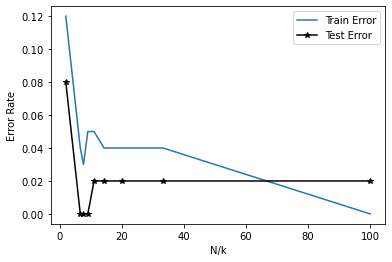

In [32]:
##Knn classification for euclidean

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Loop through different k values
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    train.append(1 - accuracy_score(y_train, train_pred))
    test.append(1 - accuracy_score(y_test, test_pred))

# now we are creating a DataFrame to store out training and testing errors to plot.
results = pd.DataFrame({'N/k': [100/k for k in k_list], 'Train Error': train, 'Test Error': test})

# Plot the results
import matplotlib.pyplot as plt
plt.plot(results['N/k'], results['Train Error'], label='Train Error')
plt.plot(results['N/k'], results['Test Error'], label='Test Error',color="k",marker="*")
plt.xlabel('N/k')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

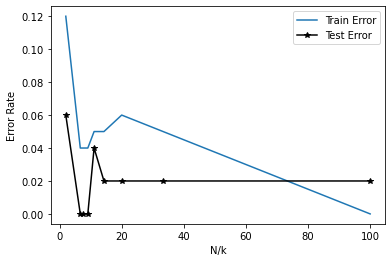

In [34]:
##Knn classification for manhattan

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Loop through different k values
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    train.append(1 - accuracy_score(y_train, train_pred))
    test.append(1 - accuracy_score(y_test, test_pred))

# now we are creating a DataFrame to store out training and testing errors to plot.
results = pd.DataFrame({'N/k': [100/k for k in k_list], 'Train Error': train, 'Test Error': test})



# Plot the results
import matplotlib.pyplot as plt
plt.plot(results['N/k'], results['Train Error'], label='Train Error')
plt.plot(results['N/k'], results['Test Error'], label='Test Error',color="k",marker="*")
plt.xlabel('N/k')
plt.ylabel('Error Rate')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

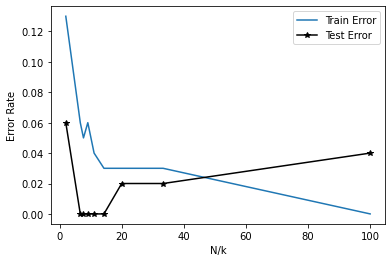

In [68]:
##Knn classification for Chebyshev distance

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Loop through different k values
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k,metric='chebyshev')
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    train.append(1 - accuracy_score(y_train, train_pred))
    test.append(1 - accuracy_score(y_test, test_pred))

# now we are creating a DataFrame to store out training and testing errors to plot.
results = pd.DataFrame({'N/k': [100/k for k in k_list], 'Train Error': train, 'Test Error': test})





# Plot the results

import matplotlib.pyplot as plt
plt.plot(results['N/k'], results['Train Error'], label='Train Error')
plt.plot(results['N/k'], results['Test Error'], label='Test Error',color="k",marker="*")
plt.xlabel('N/k')
plt.ylabel('Error Rate')
plt.legend()
plt.show()


### Part 2c Plot decision boundaries of K Nearest Neighbors
Use Scikit Learn's [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay) class to visualize the nearest neighbor boundaries as k is varied.

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay

In [35]:
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 50]

Simplify the problem by using only the first 2 attributes of the dataset

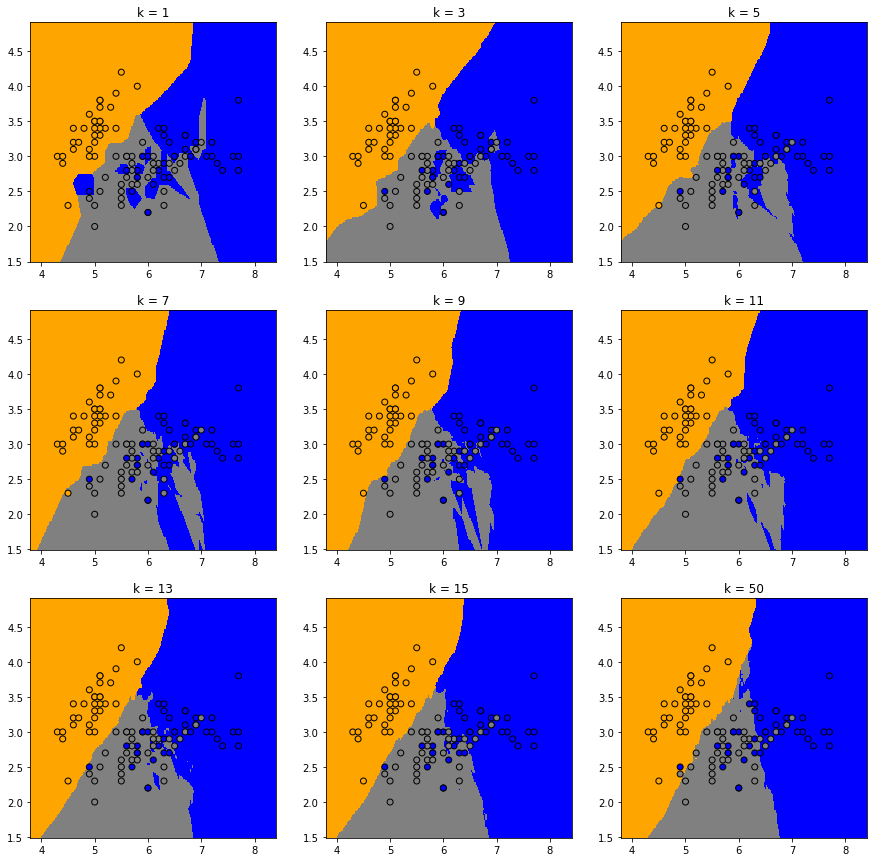

In [36]:
import numpy as np
from matplotlib.colors import ListedColormap


# Select the first 2 attributes
X2 = iris.data[:, :2]
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

# Define the k values to use
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 50]

# Create a figure and axis
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Create a color map for the points
cmap = ListedColormap(['orange', 'grey', 'blue'])

# Loop over the k values
for i, k in enumerate(k_list):
    # Fit a KNN model with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Get the axis for the current plot
    ax = axes[i//3, i%3]

    # Plot the decision boundary for the current k value
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, edgecolor='k')

    # Set the title for the plot
    ax.set_title("k = {}".format(k))

# Show the plot
plt.show()
